In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from graphviz import Source
from sklearn.tree import export_graphviz

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


**ở bảng này cho ta thấy số lượng dòng bị thiếu thông tin tương ứng cho từng cột đặc trưng của chim cánh cụt**

In [ ]:
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for col in num_cols:
    penguins[col].fillna(penguins[col].mean(), inplace=True)

/tmp/ipython-input-3807867312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins[col].fillna(penguins[col].mean(), inplace=True)


**ở các cột bill_length_mm, bill_depth_mm, flipper_length_mm và body_mass_g đều có 2 dòng bị thiếu dữ liệu, em đã xử lý tình huống này bằng cách điền giá trị trung vị vào các cột dữ liệu tương ứng, vì giá trị trung vị có độ chính xác cao hơn giá trị trung bình trong trường hợp có 1 giá trị cực lớn hoặc cực nhỏ khiến cho giá trị trung bình bị kéo theo.**

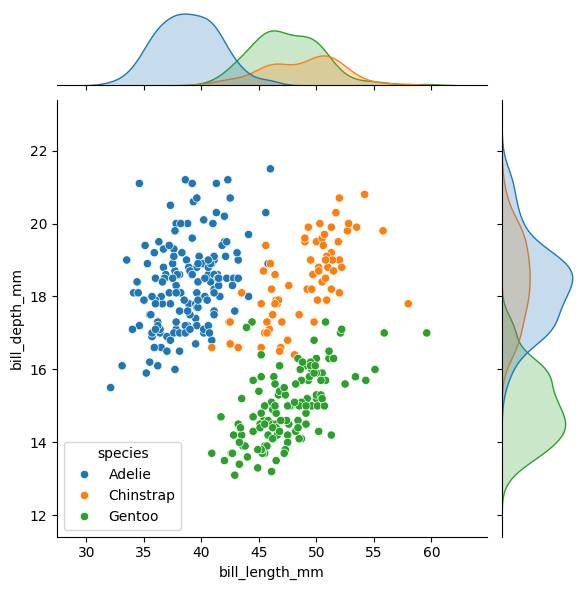

In [ ]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

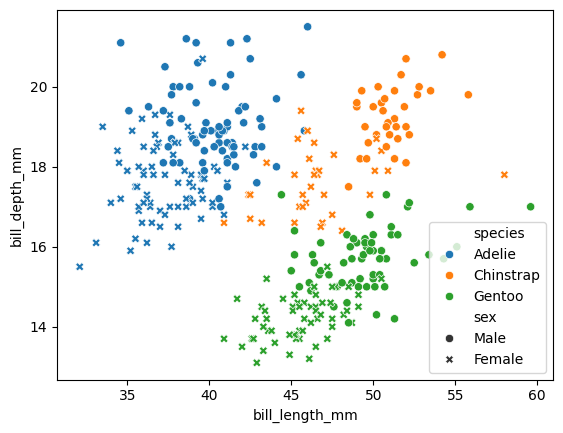

In [ ]:
sns.scatterplot(
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="sex",
    data=penguins
)

<Axes: xlabel='body_mass_g', ylabel='Count'>

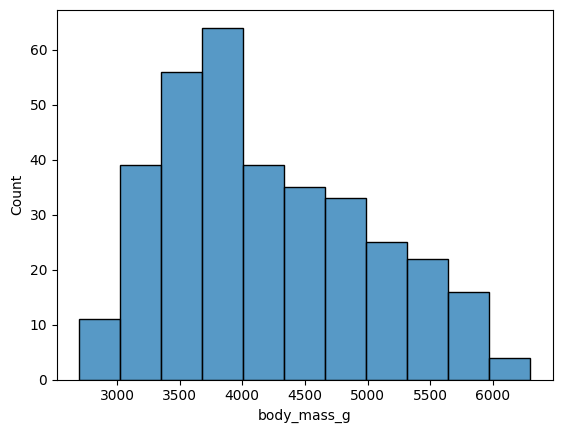

In [ ]:
sns.histplot(data=penguins["body_mass_g"])

<Axes: xlabel='body_mass_g', ylabel='Density'>

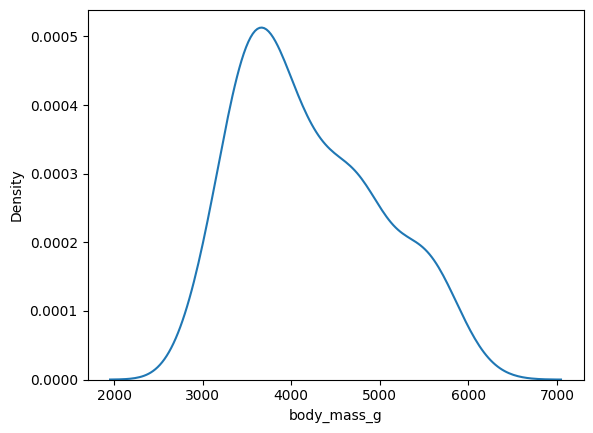

In [ ]:
sns.kdeplot(data=penguins["body_mass_g"])

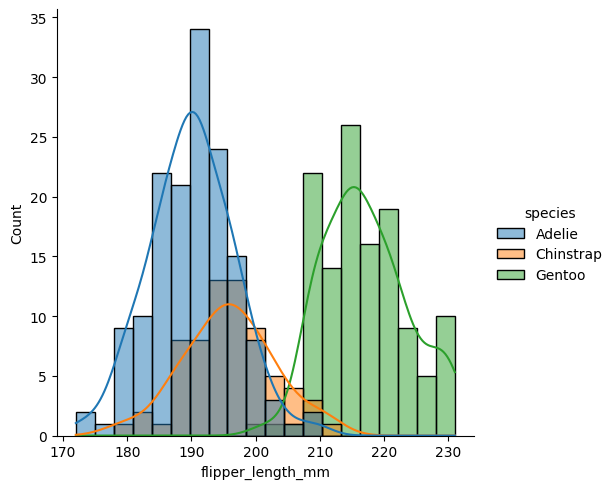

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kde=True, bins=20)



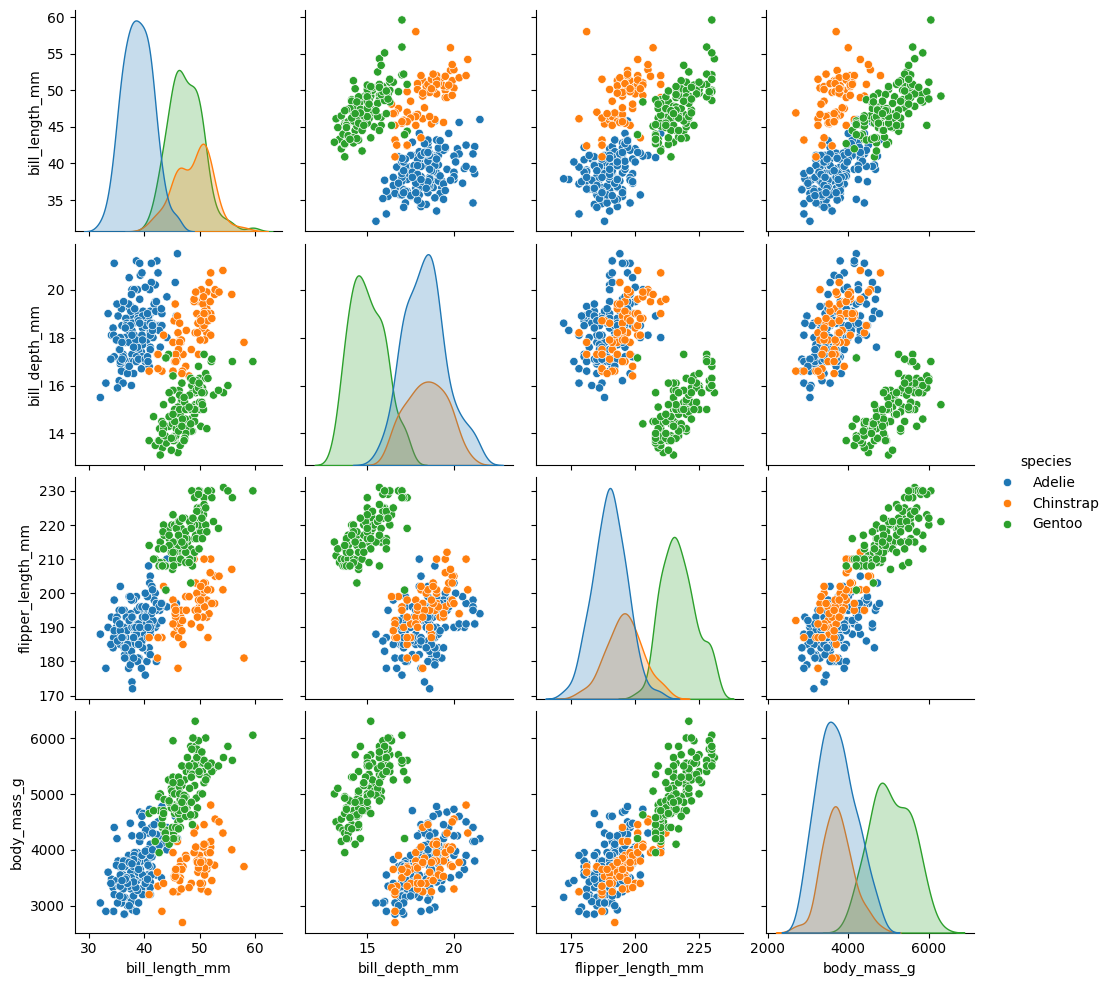

In [ ]:
sns.pairplot(penguins, hue="species")

<Axes: xlabel='species', ylabel='flipper_length_mm'>

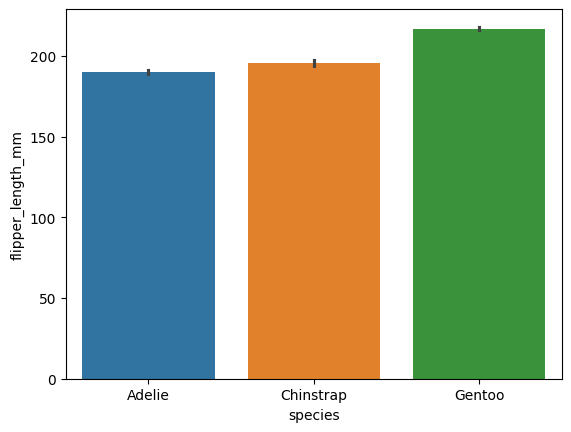

In [ ]:
sns.barplot(data=penguins,x='species',y='flipper_length_mm',estimator=np.mean,hue='species')

<Axes: xlabel='island', ylabel='body_mass_g'>

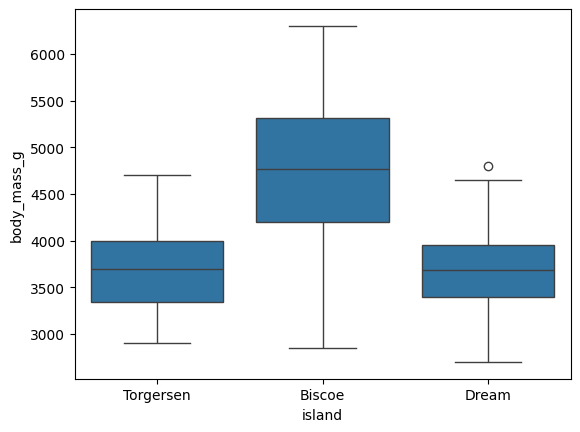

In [ ]:
sns.boxplot(data=penguins,x='island',y='body_mass_g')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X=penguins[["body_mass_g","bill_length_mm","bill_depth_mm", "flipper_length_mm"]]
y=penguins["species"]
model=DecisionTreeClassifier(max_depth=2,random_state=24521703)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24521703)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=24521703)

In [ ]:
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 275\nvalue = [115.0, 54.0, 106.0]\nclass = Adelie'),
 Text(0.25, 0.5, 'bill_length_mm <= 44.65\ngini = 0.429\nsamples = 163\nvalue = [113, 49, 1]\nclass = Adelie'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.083\nsamples = 115\nvalue = [110, 5, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.155\nsamples = 48\nvalue = [3, 44, 1]\nclass = Chinstrap'),
 Text(0.75, 0.5, 'bill_depth_mm <= 17.65\ngini = 0.119\nsamples = 112\nvalue = [2, 5, 105]\nclass = Gentoo'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 105\nvalue = [0, 0, 105]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]\nclass = Chinstrap')]

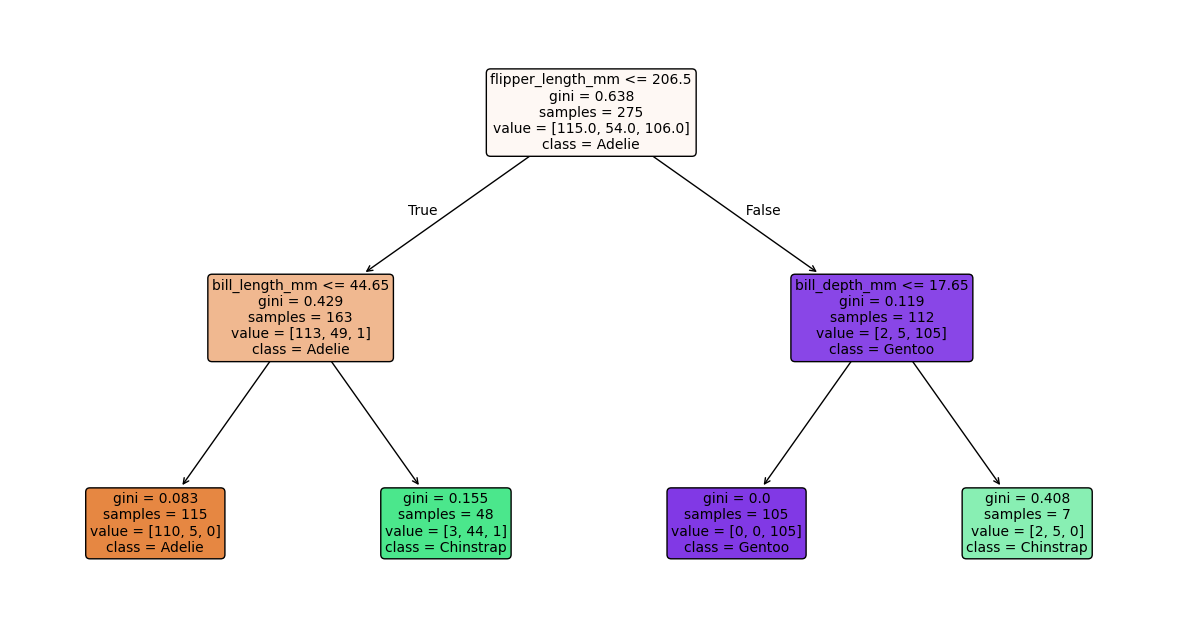

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    fontsize=10
)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Độ chính xác:",acc)

Độ chính xác: 0.9710144927536232


**Khi em đặt max_depth=1, thì độ chính xác của mô hình là 0.73
Khi max_depth>=2, độ chính xác của mô hình là 0.97
Ta có thể thấy khi max_depth=1 thì xảy ra trường hợp underfitting do cây quá nông, mô hình quá đơn giản nên nó không thể học hết được dữ liệu
Khi max_depth>=2 thì độ chính xác là 0.971. Đây là mức lý tưởng cho bài toán.
Tuy nhiên, xét về thực nghiệm thì trong bài này khi ta tăng max_depth lên cao vẫn không xảy ra tình trạng overfitting(ta có thể thấy thông qua độ chính xác vẫn giữ nguyên 0.971 dù tăng max_depth lên 50). Bởi vì tập dữ liệu ít có những phần tử nhiễu nên cây sâu không gặp tình huống dự đoán sai trên test**